In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

FOLDERNAME = 'poketest'
assert FOLDERNAME is not None, "[!] Enter the foldername."

import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

#input_data= '/content/drive/MyDrive/ai_final/'


Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Conv2D,MaxPooling2D
from keras.utils import np_utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os,cv2
import random

In [ ]:
def get_images(directory):
    Images=[]
    Labels=[]
    label=0
    
    for labels in os.listdir(directory):
        if labels == 'Zubat':
            label = 0
        elif labels == 'Zapdos':
            label = 1
        elif labels == 'Wigglytuff':
            label = 2
        elif labels == 'Weezing':
            label = 3
        elif labels == 'Weepinbell':
            label = 4
        elif labels == 'Weedle':
            label = 5
        elif labels == 'Wartortle':
            label = 6
        elif labels == 'Vulpix':
            label = 7
        elif labels == 'Victreebel':
            label = 8
        elif labels == 'Venusaur':
            label = 9
        elif labels == 'Venonat':
            label = 10
        elif labels == 'Vaporeon':
            label = 11
        elif labels == 'Tentacruel':
            label = 12
        elif labels == 'Tauros':
            label = 13
        elif labels == 'Tangela':
            label = 14
        elif labels == 'Paras':
            label = 15
        elif labels == 'Persian':
            label = 16
        elif labels == 'Pidgeotto':
            label = 17
        elif labels == 'Pikachu':
            label = 18
        elif labels == 'Poliwag':
            label = 19
        elif labels == 'Omanyte':
            label = 20
        elif labels == 'Oddish':
            label = 21
        elif labels == 'Nidoran-m':
            label = 22
        elif labels == 'Nidoran-f':
            label = 23
        elif labels == 'Muk':
            label = 24
        elif labels == 'Mr.Mime':
            label = 25
        elif labels == 'Krabby':
            label = 26
        elif labels == 'Kingler':
            label = 27
        elif labels == 'Kakuna':
            label = 28
        elif labels == 'Jynx':
            label = 29
        elif labels == 'Jigglypuff':
            label = 30
        elif labels == 'Ivysaur':
            label = 31
        elif labels == 'Golduck':
            label = 32
        elif labels == 'Hitmonlee':
            label = 33
        elif labels == 'Gloom':
            label = 34
        elif labels == 'Exeggcute':
            label = 35
        elif labels == 'Eevee':
            label = 36
        elif labels == 'Dugtrio':
            label = 37
        elif labels == 'Dratini':
            label = 38
        elif labels == 'Charmeleon':
            label = 39
        elif labels == 'Eexggutor':
            label = 40
        
        
        for images_file in os.listdir(directory+labels):
            image=cv2.imread(directory+labels+r'/'+images_file) #read the images
            try:
              image=cv2.resize(image,(150,150))
            except cv2.error as e:
              print('Invalid frame!')
            Images.append(image)
            Labels.append(label)
    
    #return random.shuffle(Images,Labels)
    return Images,Labels


In [ ]:
def get_classlabel(class_code):
    labels={0:'Zubat',1:'Zapdos',2:'Wigglytuff',3:'Weezing',4:'Weepinbell',5:'Weedle',6:'Wartortle',7:'Vulpix',8:'Victreebel',
            9:'Venusaur',10:'Venonat',11:'Vaporeon',12:'Tentacruel',13:'Tauros',14:'Tangela',15:'Paras',16:'Persian',17:'Pidgeotto',18:'Pikachu',
            19:'Poliwag',20:'Omanyte',21:'Oddish',22:'Nidoran-m',23:'Nidoran-f',24:'Muk',25:'Mr.Mime',26:'Krabby',27:'Kingler',28:'Kakuna',29:'Jynx',
            30:'Jigglypuff',31:'Ivysaur',32:'Golduck',33:'Hitmonlee',34:'Gloom',35:'Exeggcute',36:'Eevee',37:'Dugtrio',38:'Dratini',39:'Charmeleon',40:'Exeggutor'}
    return labels[class_code]

In [ ]:
Images,Labels=get_images('/content/drive/My Drive/poketest/')
Images=np.array(Images)
Labels=np.array(Labels)
    

In [ ]:
permutation = np.random.permutation(Labels.shape[0])
shuffled_Images =Images[permutation, :, :, :]
shuffled_Labels =Labels[permutation]

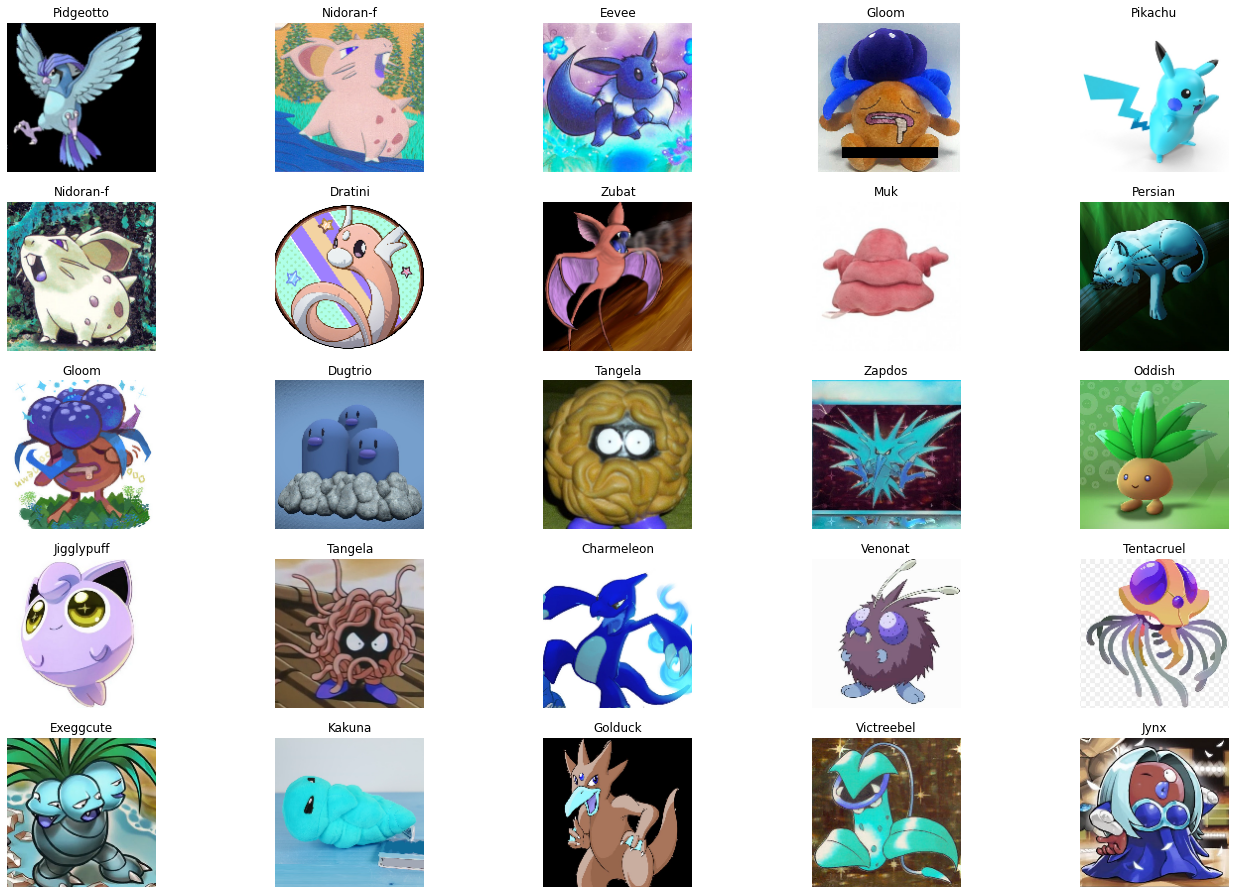

In [ ]:
f,ax=plt.subplots(5,5)
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
  for j in range(0,5,1):
    rnd_number=random.randint(0,len(Images))
    ax[i,j].imshow(Images[rnd_number])
    ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
    ax[i,j].axis('off')

In [ ]:
print(Images.shape)
print(Labels.shape)
print(type(Images))
print(type(Labels))

(3121, 150, 150, 3)
(3121,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
rate=0.8
X_train=shuffled_Images[:int(shuffled_Images.shape[0]*rate)]
Y_train=shuffled_Labels[:int(shuffled_Labels.shape[0]*rate)]
X_test=shuffled_Images[int(shuffled_Images.shape[0]*rate):]
Y_test=shuffled_Labels[int(shuffled_Labels.shape[0]*rate):]
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(2496, 150, 150, 3)
(2496,)
(625, 150, 150, 3)
(625,)


**First model**

In [ ]:
model = Sequential()

model.add(Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(5,5))
model.add(Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(5,5))
model.add(Flatten())
model.add(Dense(180,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(41,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 200)     5600      
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 180)     324180    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 180)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 27, 140)       226940    
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 100)       126100    
                                                                 
 conv2d_4 (Conv2D)           (None, 23, 23, 50)        45050     
                                                        

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer,loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
trained=model.fit(X_train,Y_train,epochs=100,batch_size=32,validation_split=0.3)

Epoch 1/100
55/55 [==============================] - 56s 738ms/step - loss: 4.5116 - acc: 0.0229 - val_loss: 3.7048 - val_acc: 0.0401
Epoch 2/100
55/55 [==============================] - 31s 556ms/step - loss: 3.7017 - acc: 0.0263 - val_loss: 3.6933 - val_acc: 0.0227
Epoch 3/100
55/55 [==============================] - 31s 559ms/step - loss: 3.6898 - acc: 0.0424 - val_loss: 3.6284 - val_acc: 0.0561
Epoch 4/100
55/55 [==============================] - 31s 559ms/step - loss: 3.6142 - acc: 0.0607 - val_loss: 3.5379 - val_acc: 0.0975
Epoch 5/100
55/55 [==============================] - 31s 559ms/step - loss: 3.5373 - acc: 0.0836 - val_loss: 3.4040 - val_acc: 0.1322
Epoch 6/100
55/55 [==============================] - 31s 558ms/step - loss: 3.3703 - acc: 0.0990 - val_loss: 3.0163 - val_acc: 0.2096
Epoch 7/100
55/55 [==============================] - 31s 559ms/step - loss: 3.1791 - acc: 0.1448 - val_loss: 3.0025 - val_acc: 0.2083
Epoch 8/100
55/55 [==============================] - 31s 556ms

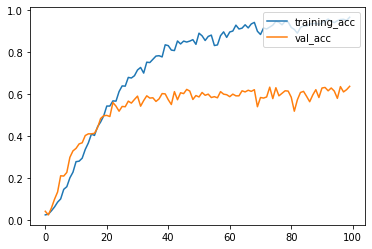

In [ ]:
#plot model acc
plt.rcParams['figure.figsize']=(6,4)
plt.plot(trained.history['acc'],label='training_acc')
plt.plot(trained.history['val_acc'],label='val_acc')
plt.legend(loc='upper right')
plt.show()
plt.close()

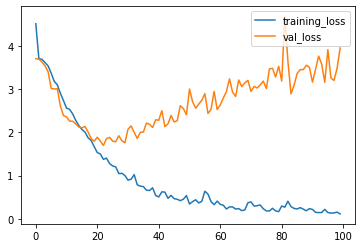

In [ ]:
#plot model loss
plt.rcParams['figure.figsize']=(6,4)
plt.plot(trained.history['loss'],label='training_loss')
plt.plot(trained.history['val_loss'],label='val_loss')
plt.legend(loc='upper right')
plt.show()
plt.close()

In [ ]:

model.evaluate(X_test,Y_test,verbose=1)


20/20 [==============================] - 7s 337ms/step - loss: 3.8548 - acc: 0.6592


[3.854764461517334, 0.6592000126838684]


**Second model**


*   learning_rate改為0.0001
*   batch_size改為64
*   輸出層activation改為softmax






In [ ]:
model = Sequential()

model.add(Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(5,5))
model.add(Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(5,5))
model.add(Flatten())
model.add(Dense(180,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(41,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 200)     5600      
                                                                 
 conv2d_6 (Conv2D)           (None, 146, 146, 180)     324180    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 180)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 27, 27, 140)       226940    
                                                                 
 conv2d_8 (Conv2D)           (None, 25, 25, 100)       126100    
                                                                 
 conv2d_9 (Conv2D)           (None, 23, 23, 50)        45050     
                                                      

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer,loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
trained=model.fit(X_train,Y_train,epochs=100,batch_size=64,validation_split=0.3)

Epoch 1/100
28/28 [==============================] - 50s 1s/step - loss: 4.8806 - acc: 0.0321 - val_loss: 3.7119 - val_acc: 0.0280
Epoch 2/100
28/28 [==============================] - 38s 1s/step - loss: 3.7122 - acc: 0.0309 - val_loss: 3.7099 - val_acc: 0.0360
Epoch 3/100
28/28 [==============================] - 38s 1s/step - loss: 3.7107 - acc: 0.0349 - val_loss: 3.7138 - val_acc: 0.0320
Epoch 4/100
28/28 [==============================] - 38s 1s/step - loss: 3.7120 - acc: 0.0429 - val_loss: 3.7006 - val_acc: 0.0521
Epoch 5/100
28/28 [==============================] - 38s 1s/step - loss: 3.7035 - acc: 0.0389 - val_loss: 3.6814 - val_acc: 0.0387
Epoch 6/100
28/28 [==============================] - 38s 1s/step - loss: 3.6993 - acc: 0.0389 - val_loss: 3.6931 - val_acc: 0.0387
Epoch 7/100
28/28 [==============================] - 38s 1s/step - loss: 3.6852 - acc: 0.0406 - val_loss: 3.6477 - val_acc: 0.0614
Epoch 8/100
28/28 [==============================] - 38s 1s/step - loss: 3.6496 - a

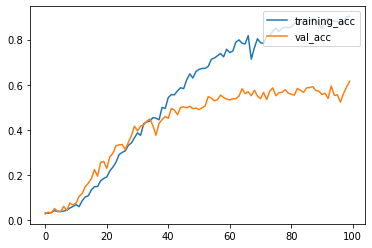

In [ ]:
#plot model acc
plt.rcParams['figure.figsize']=(6,4)
plt.plot(trained.history['acc'],label='training_acc')
plt.plot(trained.history['val_acc'],label='val_acc')
plt.legend(loc='upper right')
plt.show()
plt.close()

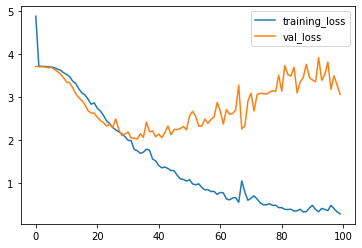

In [ ]:
#plot model loss
plt.rcParams['figure.figsize']=(6,4)
plt.plot(trained.history['loss'],label='training_loss')
plt.plot(trained.history['val_loss'],label='val_loss')
plt.legend(loc='upper right')
plt.show()
plt.close()

In [ ]:

model.evaluate(X_test,Y_test,verbose=1)


20/20 [==============================] - 3s 135ms/step - loss: 3.1729 - acc: 0.6096


[3.172908306121826, 0.6096000075340271]

**Third model**



*   Conv2D改為６層




In [ ]:
model = Sequential()

model.add(Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(5,5))
model.add(Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(5,5))
model.add(Flatten())
model.add(Dense(180,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(41,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 200)     5600      
                                                                 
 conv2d_11 (Conv2D)          (None, 146, 146, 180)     324180    
                                                                 
 conv2d_12 (Conv2D)          (None, 144, 144, 100)     162100    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 28, 28, 100)      0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 26, 26, 140)       126140    
                                                                 
 conv2d_14 (Conv2D)          (None, 24, 24, 100)       126100    
                                                      

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer,loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
trained=model.fit(X_train,Y_train,epochs=100,batch_size=64,validation_split=0.3)

Epoch 1/100
28/28 [==============================] - 65s 2s/step - loss: 4.4480 - acc: 0.0235 - val_loss: 3.7185 - val_acc: 0.0320
Epoch 2/100
28/28 [==============================] - 55s 2s/step - loss: 3.7323 - acc: 0.0303 - val_loss: 3.6922 - val_acc: 0.0414
Epoch 3/100
28/28 [==============================] - 55s 2s/step - loss: 3.6704 - acc: 0.0418 - val_loss: 3.6397 - val_acc: 0.0668
Epoch 4/100
28/28 [==============================] - 55s 2s/step - loss: 3.6452 - acc: 0.0395 - val_loss: 3.6039 - val_acc: 0.0521
Epoch 5/100
28/28 [==============================] - 55s 2s/step - loss: 3.5821 - acc: 0.0647 - val_loss: 3.5136 - val_acc: 0.0721
Epoch 6/100
28/28 [==============================] - 55s 2s/step - loss: 3.5078 - acc: 0.0864 - val_loss: 3.4049 - val_acc: 0.1268
Epoch 7/100
28/28 [==============================] - 55s 2s/step - loss: 3.4163 - acc: 0.0996 - val_loss: 3.2780 - val_acc: 0.1522
Epoch 8/100
28/28 [==============================] - 55s 2s/step - loss: 3.3307 - a

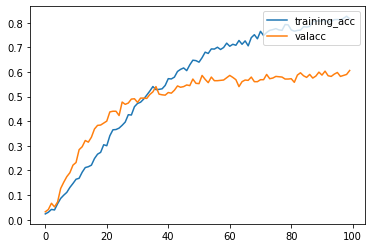

In [ ]:
#plot model acc
plt.rcParams['figure.figsize']=(6,4)
plt.plot(trained.history['acc'],label='training_acc')
plt.plot(trained.history['val_acc'],label='valacc')
plt.legend(loc='upper right')
plt.show()
plt.close()

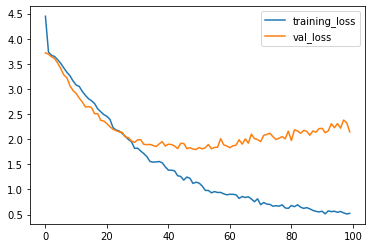

In [ ]:
#plot model loss
plt.rcParams['figure.figsize']=(6,4)
plt.plot(trained.history['loss'],label='training_loss')
plt.plot(trained.history['val_loss'],label='val_loss')
plt.legend(loc='upper right')
plt.show()
plt.close()

In [ ]:

model.evaluate(X_test,Y_test,verbose=1)

20/20 [==============================] - 7s 310ms/step - loss: 1.7605 - acc: 0.6624


[1.7605226039886475, 0.6624000072479248]

**比較三種方式：**